## Preprocessing and Training

In our previous notebook we used PCA analysis to reduce the deminsionality of our stock_price dataset and found that 3 components explains 94% of the variance of the data. 

Now that we have a good estimation of the overall health of Cryptocurrencies(mimic CCI30 index), lets take a look if Google trend search results historically affect Cryptocurrency price and in future notebook, see if it can predict CCCI30 price. 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
#load google trends dataset
gtrends = pd.read_csv('../Data/GoogleSearchTrends.csv')

In [3]:
gtrends.set_index('Week', inplace= True)

In [4]:
gtrends.index = pd.to_datetime(gtrends.index)

In [5]:
gtrends=gtrends.loc['2018-10-07':,:]

In [6]:
gtrends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2018-10-07 to 2021-08-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Cryptocurrency_gs  148 non-null    int64 
 1   Bitcoin_gs         148 non-null    int64 
 2   Ethereum_gs        148 non-null    int64 
 3   XRP_gs             148 non-null    object
 4   Dogecoin_gs        148 non-null    object
dtypes: int64(3), object(2)
memory usage: 6.9+ KB


In [7]:
gtrends

,Cryptocurrency_gs,Bitcoin_gs,Ethereum_gs,XRP_gs,Dogecoin_gs
Week,,,,,
2018-10-07,3,9,1,1,<1
2018-10-14,2,9,1,1,<1
2018-10-21,2,8,1,1,<1
2018-10-28,2,8,1,1,<1
2018-11-04,2,8,1,1,<1
...,...,...,...,...,...
2021-07-04,9,24,6,1,4
2021-07-11,8,23,6,1,3
2021-07-18,8,27,6,1,3


XRP and Dogecoin is a object. We need to clean the data and turn it into an int64 column type

In [8]:
#replace all instances of '<1' in the column with 0

gtrends= gtrends.replace('<1',0)

gtrends['XRP_gs'] = pd.to_numeric(gtrends['XRP_gs'])                                               
gtrends['Dogecoin_gs'] = pd.to_numeric(gtrends['Dogecoin_gs'])                                                 
gtrends.info()
gtrends.to_csv('../Data/GoogleTrendsCleaned.csv')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 148 entries, 2018-10-07 to 2021-08-01
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Cryptocurrency_gs  148 non-null    int64
 1   Bitcoin_gs         148 non-null    int64
 2   Ethereum_gs        148 non-null    int64
 3   XRP_gs             148 non-null    int64
 4   Dogecoin_gs        148 non-null    int64
dtypes: int64(5)
memory usage: 6.9 KB


Text(0.5, 1.0, 'Google Search Popularity Over Time')

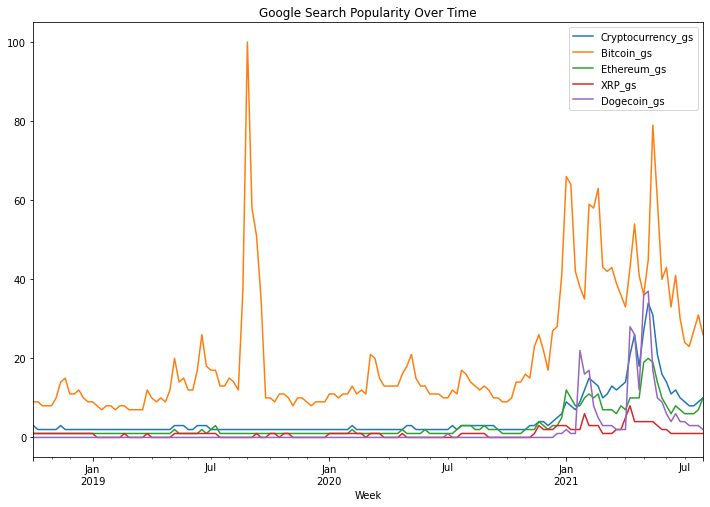

In [9]:
#Plot the google trends data
gtrends.plot(y = ['Cryptocurrency_gs','Bitcoin_gs','Ethereum_gs','XRP_gs','Dogecoin_gs'], figsize=(12, 8))
plt.title('Google Search Popularity Over Time')

Now that we have plotted the google trends data, lets look at the PCA Mean for 4 components

## Plotting PCA dataset using the mean of the rows

In [10]:
pca_dataset = pd.read_csv('../Data/PCA_Dataset.csv', index_col = 0)

In [11]:
pca_dataset.head()

,principal component 1,principal component 2,principal component 3,principal component 4
Date,,,,
2018-10-07,-0.823952,1.418253,2.294208,0.482584
2018-10-14,-0.793792,1.747478,4.087281,1.587610
2018-10-21,-0.852095,1.390536,2.672385,0.713767
2018-10-28,-0.802926,0.290508,2.351411,-0.359719
2018-11-04,-0.540766,1.024355,2.437822,0.077357


In [70]:
pca_dataset.index = pd.to_datetime(pca_dataset.index)
pca_dataset = np.abs(pca_dataset)
pca_dataset['PCA_mean'] = pca_dataset.mean(axis=1)

<AxesSubplot:xlabel='Date'>

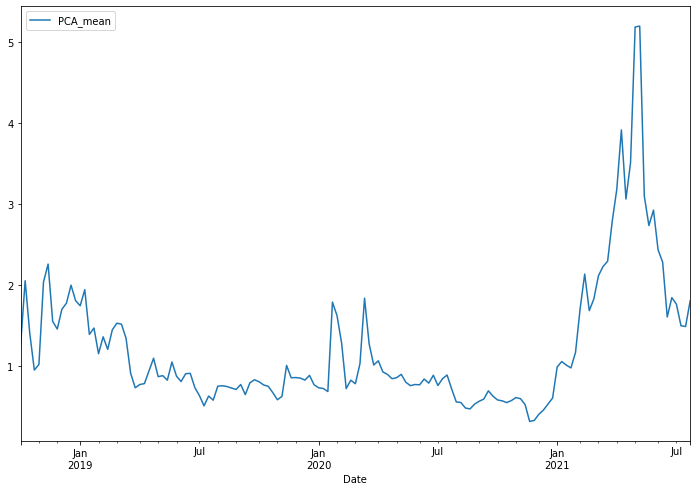

In [74]:
pca_dataset.plot(y = 'PCA_mean', figsize = (12,8))

Both graphs follow a similar structure. Google trends has a spike in populatirty around the beginning of 2021. 
The PCA graph shows a increase in closing price also around the same time in 2021

In [14]:
pca_dataset.to_csv("../Data/PCA_Dataset_With_Mean.csv")

In [73]:
pca_dataset

,principal component 1,principal component 2,principal component 3,principal component 4,PCA_mean
Date,,,,,
2018-10-07,0.823952,1.418253,2.294208,0.482584,1.254750
2018-10-14,0.793792,1.747478,4.087281,1.587610,2.054040
2018-10-21,0.852095,1.390536,2.672385,0.713767,1.407196
2018-10-28,0.802926,0.290508,2.351411,0.359719,0.951141
2018-11-04,0.540766,1.024355,2.437822,0.077357,1.020075
...,...,...,...,...,...
2021-06-27,5.696667,0.093772,0.595388,0.996067,1.845474
2021-07-04,5.349030,0.184634,0.607692,0.914620,1.763994
2021-07-11,4.455018,0.252711,0.513414,0.771198,1.498085


In [55]:
cci30 = pd.read_csv('../Data/cci30_OHLCV.csv')
cci30=cci30.set_index('Date')
cci30 = cci30.loc['2021-08-01':'2018-10-08',:]['Close']
cci30 = cci30.sort_index(ascending = True)
cci30 = pd.DataFrame(cci30)
cci30.index = pd.to_datetime(cci30.index)
cci30= cci30.resample('W', label = 'left').apply('mean')
cci30

,Close
Date,
2018-10-07,3948.598571
2018-10-14,3933.995714
2018-10-21,3904.325714
2018-10-28,3807.310000
2018-11-04,4029.460000
...,...
2021-06-27,16328.300000
2021-07-04,15894.328571
2021-07-11,14404.028571


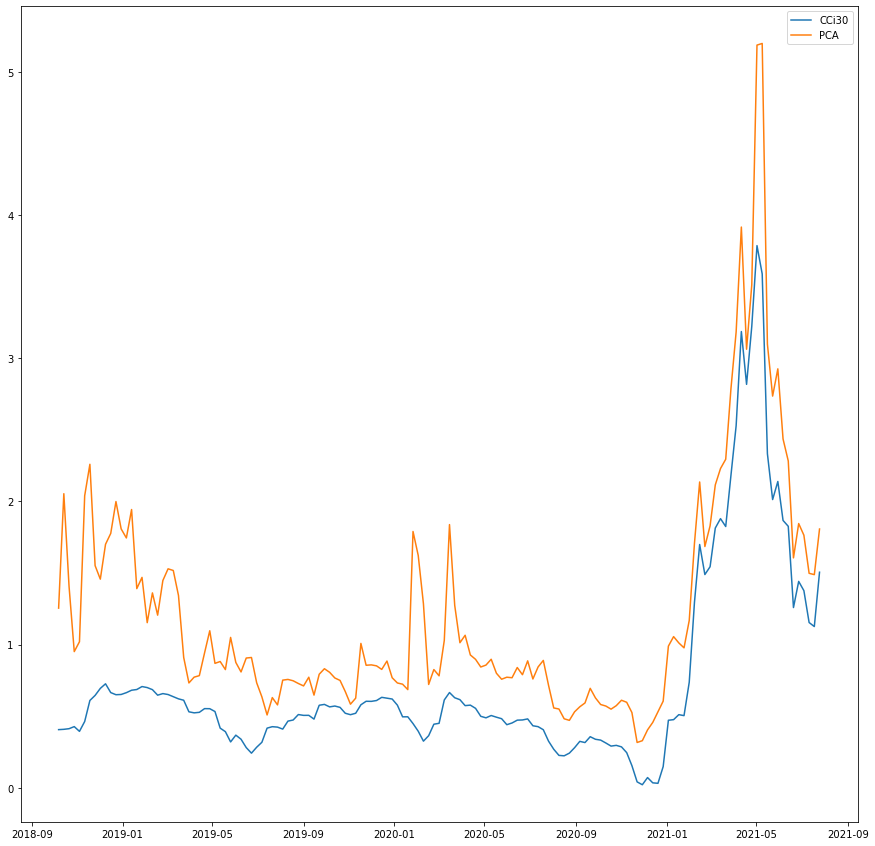

In [77]:
plt.figure(figsize = (15,15))

scaled = StandardScaler()

cci30_scaled = scaled.fit_transform(cci30)

cci30_scaled = np.abs(cci30_scaled)


plt.plot(pca_dataset.index,cci30_scaled)
plt.plot(pca_dataset.index, pca_dataset['PCA_mean'])
plt.legend(['CCi30','PCA'])
plt.show()

In [37]:
cci30

,Open,High,Low,Close,Volume
Date,,,,,
